In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [45]:
file_path = '../notebooks/Clean_Data_Preprocessed.csv'  # Use '..' to go up one level

df = pd.read_csv(file_path, encoding='UTF-8')

df.head(10)

,Puissance administrative,Puissance maximale (kW),Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),CO type I (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),...,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INF,gamme_MOY-INFER,gamme_MOY-SUPER,gamme_SUPERIEURE
0,0.1375,0.249408,0.274939,0.247934,0.283262,0.284404,0.617861,0.016802,0.696969,0.003279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.1000,0.209357,0.160584,0.123967,0.167382,0.200000,0.194185,0.091057,0.567164,0.004918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0750,0.163845,0.160584,0.115702,0.167382,0.196330,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0750,0.163845,0.160584,0.115702,0.167382,0.196330,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.1000,0.209357,0.167883,0.123967,0.175966,0.205505,0.057113,0.088347,0.578358,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.1000,0.209357,0.167883,0.123967,0.175966,0.205505,0.057113,0.088347,0.578358,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.1375,0.249408,0.279805,0.264463,0.291845,0.291743,0.617861,0.016802,0.696969,0.003279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.1000,0.209357,0.163017,0.132231,0.171674,0.205505,0.194185,0.091057,0.567164,0.004918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0750,0.163845,0.165450,0.123967,0.171674,0.201835,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0750,0.163845,0.165450,0.123967,0.171674,0.201835,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
# Separating target feature from the remaining features
X = df.drop(columns=['CO2 (g/km)'])  # Features
y = df['CO2 (g/km)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.648571126625918e-05


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.002595561900108342
Root Mean Squared Error (RMSE): 0.0051464270388551295
R-squared (R2): 0.9944408953741078


In [48]:
from sklearn.decomposition import PCA
# Separating target feature from the remaining features
X = df.drop(columns=['CO2 (g/km)'])  # Features
y = df['CO2 (g/km)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Fit PCA on training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.0005988825887608513
Mean Absolute Error (MAE): 0.01780024824426031
Root Mean Squared Error (RMSE): 0.02447207773689948
R-squared (R2): 0.8743001108757108


In [49]:
from sklearn.linear_model import Ridge

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model with a specific alpha (regularization strength)
alpha = 1.0  # We can adjust this value based on cross-validation
ridge_model = Ridge(alpha=alpha)

# Train the Ridge Regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 2.922164526512905e-05
Mean Absolute Error (MAE): 0.0028743076853024636
Root Mean Squared Error (RMSE): 0.005405704881431195
R-squared (R2): 0.9938666482566204


In [50]:
from sklearn.linear_model import RidgeCV
import numpy as np
# Define a range of alpha values to try
alphas = [0.1, 1.0, 10.0]

# Initialize RidgeCV with the list of alphas and specify cv parameter for cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the model
ridge_cv.fit(X_train, y_train)

# Get the optimal alpha
optimal_alpha = ridge_cv.alpha_
print("Optimal Alpha:", optimal_alpha)
# Make predictions on the test set
y_pred = ridge_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Optimal Alpha: 0.1
Mean Squared Error (MSE): 2.7492705385780965e-05
Mean Absolute Error (MAE): 0.0026688016450273576
Root Mean Squared Error (RMSE): 0.0052433486805457605
R-squared (R2): 0.9942295366678302


In [51]:
from sklearn.model_selection import GridSearchCV

# 1. Apply dimensionality reduction technique (e.g., PCA)
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 3. Apply Ridge Regression with cross-validation
param_grid = {'alpha': [0.1, 1, 10]}  # Example alpha values
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the optimal alpha
optimal_alpha = grid_search.best_params_['alpha']
print("Optimal Alpha:", optimal_alpha)

# Apply Ridge Regression with the optimal alpha
ridge_model = Ridge(alpha=optimal_alpha)
ridge_model.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Optimal Alpha: 1
Mean Squared Error (MSE): 0.0005945705163835583
Mean Absolute Error (MAE): 0.01775116261168553
Root Mean Squared Error (RMSE): 0.024383816690246796
R-squared (R2): 0.8752051747895626


In [52]:
from sklearn.linear_model import Lasso

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the Lasso Regression model
alpha = 0.1  # regularization parameter
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.004764564350626007
Mean Absolute Error (MAE): 0.05109835557138939
Root Mean Squared Error (RMSE): 0.06902582379534494
R-squared (R2): -3.777341135546841e-05


In [53]:
from sklearn.model_selection import GridSearchCV

# Define the Lasso Regression model
lasso_model = Lasso()

# Define the alpha values to search
alphas = [0.01, 0.1, 1.0, 10.0]  # Example values

# Define the parameter grid
param_grid = {'alpha': alphas}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform GridSearchCV
grid_search.fit(X, y)

# Get the best alpha value
optimal_alpha = grid_search.best_params_['alpha']

# Print the optimal alpha value
print("Optimal Alpha:", optimal_alpha)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Lasso Regression model
lasso_model = Lasso(alpha=optimal_alpha)  # Use the optimal alpha obtained from GridSearchCV

# Train the Lasso Regression model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Optimal Alpha: 0.01
Mean Squared Error (MSE): 0.0029877575268617627
Mean Absolute Error (MAE): 0.0374890930641223
Root Mean Squared Error (RMSE): 0.05466038352281991
R-squared (R2): 0.3728974645366506


In [54]:
from sklearn.linear_model import ElasticNet

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the ElasticNet Regression model
alpha = 0.1  # regularization parameter
l1_ratio = 0.5  # mixing parameter, 0.0 for L2 penalty, 1.0 for L1 penalty
elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elasticnet_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elasticnet_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.004764564350626007
Mean Absolute Error (MAE): 0.05109835557138939
Root Mean Squared Error (RMSE): 0.06902582379534494
R-squared (R2): -3.777341135546841e-05


In [55]:
from sklearn.model_selection import GridSearchCV

# Define the ElasticNet model
elastic_net = ElasticNet()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Mixing parameter
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the ElasticNet model with the best hyperparameters
best_elastic_net = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
best_elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Mean Squared Error (MSE): 0.003333713164768763
R-squared (R2): 0.30028459159136967


In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Explained Variance Score:", explained_variance)


Mean Squared Error (MSE): 5.0408947205889875e-06
R-squared (R2): 0.9989419630502595
Mean Absolute Error (MAE): 0.00016894822536393775
Root Mean Squared Error (RMSE): 0.0022451936933344943
Explained Variance Score: 0.9989419815252438


In [57]:
from sklearn.decomposition import PCA


# Assuming X contains your features and y contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train a decision tree regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
explained_variance = explained_variance_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Explained Variance Score:", explained_variance)


Mean Squared Error (MSE): 7.293080520500923e-05
R-squared (R2): 0.9846925018358221
Mean Absolute Error (MAE): 0.0012739928590183088
Root Mean Squared Error (RMSE): 0.008539953466208656
Explained Variance Score: 0.9846934559572341


In [58]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Explained Variance Score:", evs)


Mean Squared Error (MSE): 4.391058709938986e-06
R-squared (R2): 0.9990783575890566
Mean Absolute Error (MAE): 0.0002066444634440724
Root Mean Squared Error (RMSE): 0.0020954853160876567
Explained Variance Score: 0.9990784006100025


In [59]:
from sklearn.tree import DecisionTreeRegressor
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
explained_variance = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Explained Variance Score:", explained_variance)


# Sorting the Feature Importance
sorted_indices = np.argsort(feature_importance)[::-1]  # Indices of the features sorted by importance
sorted_features = X.columns[sorted_indices]  # Sorted feature names
sorted_importance = feature_importance[sorted_indices]  # Sorted importance values

# Output the sorted feature importance as text
print("Sorted Feature Importance:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance:.4f}")
    




Mean Squared Error (MSE): 5.0408947205889875e-06
R-squared (R2): 0.9989419630502595
Mean Absolute Error (MAE): 0.00016894822536393775
Root Mean Squared Error (RMSE): 0.0022451936933344943
Explained Variance Score: 0.9989419815252438
Sorted Feature Importance:
Consommation extra-urbaine (l/100km): 0.9062
Consommation mixte (l/100km): 0.0770
NOX (g/km): 0.0066
Carrosserie_COMBISPACE: 0.0022
Carburant_ES: 0.0016
Boîte de vitesse_M 5: 0.0011
Consommation urbaine (l/100km): 0.0008
HC+NOX (g/km): 0.0008
gamme_LUXE: 0.0008
Carburant_GO: 0.0008
Puissance administrative: 0.0007
CO type I (g/km): 0.0004
Boîte de vitesse_A 7: 0.0004
Carrosserie_TS TERRAINS/CHEMINS: 0.0001
masse vide euro max (kg): 0.0001
masse vide euro min (kg): 0.0000
Puissance maximale (kW): 0.0000
Boîte de vitesse_M 6: 0.0000
Particules (g/km): 0.0000
Marque_MERCEDES-BENZ: 0.0000
Carrosserie_MINIBUS: 0.0000
Carrosserie_BREAK: 0.0000
Date de mise à jour_juin-13: 0.0000
Boîte de vitesse_A 6: 0.0000
Carrosserie_BERLINE: 0.0000
g

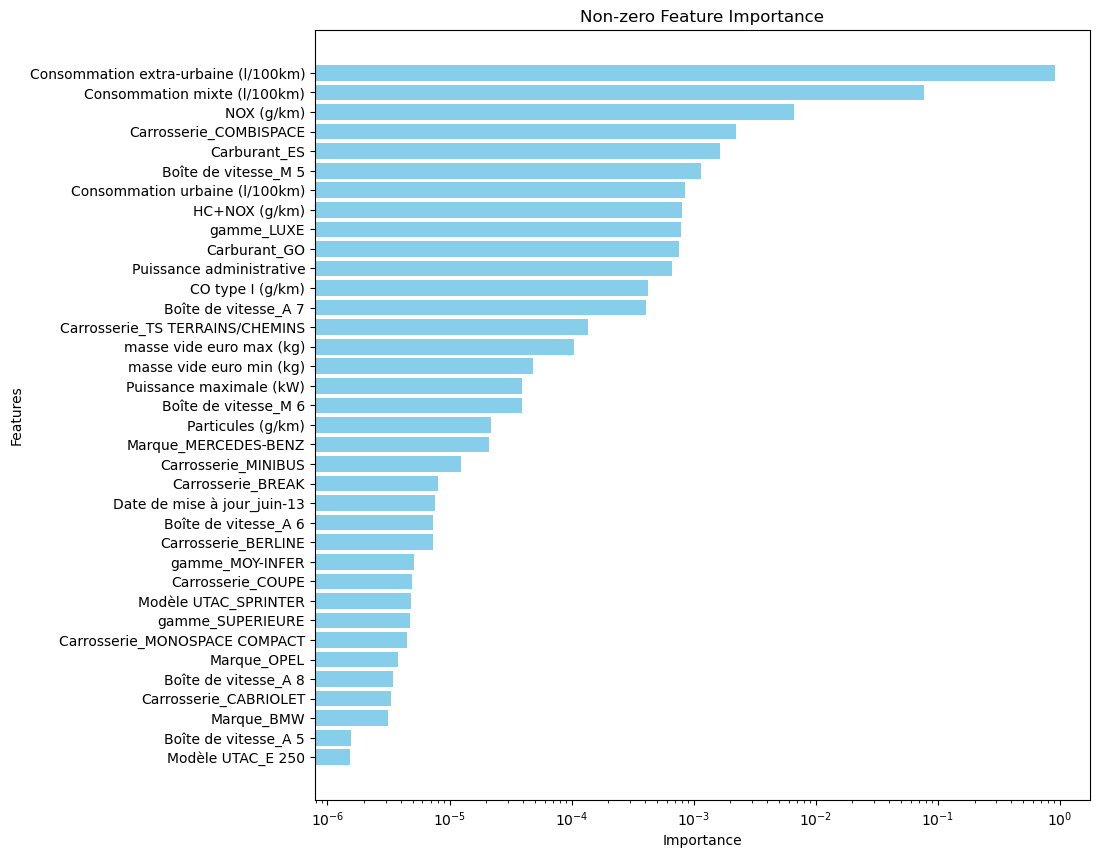

In [65]:
non_zero_indices = sorted_importance >0.000001
non_zero_features = sorted_features[non_zero_indices]
non_zero_importance = sorted_importance[non_zero_indices]

# Plotting non-zero feature importance with logarithmic y-axis scale
plt.figure(figsize=(10, 10))
plt.barh(non_zero_features, non_zero_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Non-zero Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.show()

<!-- ### There appears to be an issue with encoding the data, particularly with the "marque" variable. For instance, "BMW,Mercedes,Opel" are encoded with values ranging from 0 to 10, while "VW,...." are only represented by 0. This inconsistent encoding could impact our model's quality, potentially leading to unequal feature weighting and incorrect model training. -->

There appears to be an issue with encoding the data, particularly with the "marque" variable. For instance, "BMW, Mercedes, Opel" are encoded with values 0 or 10, while "VW" is only represented by 0. This inconsistent encoding could impact our model's quality, potentially leading to unequal feature weighting and incorrect model training. 